# k-means clustering 구현하기

## 간단한 몸풀기 & toy data 준비

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import random

In [2]:
def random_coord(x_min=0, x_max=10, y_min=0, y_max=10):
    pos_x = random.uniform(x_min, x_max)
    pos_y = random.uniform(y_min, y_max)
    return (pos_x, pos_y)

random_coord()

(6.451913685028407, 3.9860577478057593)

In [3]:
data_samples = [random_coord(2, 4, 2, 4) for _ in range(150)]
data_samples += [random_coord(6, 8, 6, 8) for _ in range(150)]
data_samples += [random_coord(2, 4, 6, 8) for _ in range(150)]
data_samples += [random_coord(6, 8, 2, 4) for _ in range(150)]

data = pd.DataFrame(data_samples, columns=['x', 'y'])

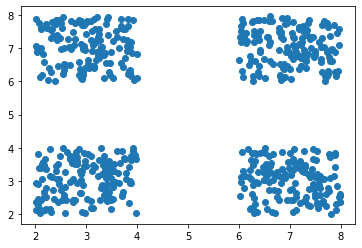

In [4]:
plt.scatter(data['x'], data['y'])

## k-means clustering 과정 진행하기
### Step 1. k 개의 랜덤 클러스터 생성
#### (편의를 위해 k = 4로 가정한다.)

In [5]:
clusters = [random_coord() for _ in range(4)]
clusters = pd.DataFrame(clusters, columns=['x', 'y'])
clusters['color'] = ['#eb2f06', '#1e3799', '#78e08f', '#ffaf40']
clusters['cluster_id'] = ['A', 'B', 'C', 'D']
clusters

,x,y,color,cluster_id
0,5.247972,8.048733,#eb2f06,A
1,3.891454,2.029028,#1e3799,B
2,2.611891,7.415151,#78e08f,C
3,9.610095,0.577975,#ffaf40,D


### 데이터 + 클러스터 스캐터 플롯

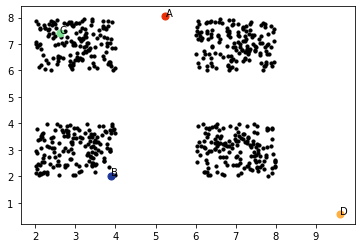

In [6]:
plt.scatter(data['x'], data['y'], c='black', s=10)
for _, (x, y, color, cluster_id) in clusters.iterrows():
    plt.scatter(x, y, c=color, s=50)
    plt.annotate(cluster_id, (x, y))

### Step 2. 데이터들 마다 거리(유클리디안 혹은 다른 메트릭)가 가장 가까운 클러스터를 결정한다.

In [7]:
def nearest_cluster(x, y, clusters):
    clusters_frame = clusters.copy()
    distance_between_cluster = lambda cluster : ((x - cluster.x)**2 + (y - cluster.y)**2)**0.5
    # distance를 계산하는 함수를 익명함수로 생성하도록 하였음. 매번 x, y 값이 바뀌므로.
    clusters_frame['distance'] = clusters_frame.apply(distance_between_cluster, axis=1)
    return clusters_frame.iloc[clusters_frame.distance.idxmin()][['cluster_id', 'color']]
    # cluster의 이름과 컬러만 있으면 됨.

In [8]:
clusters

,x,y,color,cluster_id
0,5.247972,8.048733,#eb2f06,A
1,3.891454,2.029028,#1e3799,B
2,2.611891,7.415151,#78e08f,C
3,9.610095,0.577975,#ffaf40,D


In [9]:
nearest_cluster(0, 0, clusters)

cluster_id          B
color         #1e3799
Name: 1, dtype: object

In [10]:
# 각 데이텀마다 해당하는 군집의 cluster_id 와 color를 저장
data[['cluster_id', 'color']] = data.apply(lambda datum : nearest_cluster(datum.x, datum.y, clusters), axis=1)
data

,x,y,cluster_id,color
0,2.584688,3.260437,B,#1e3799
1,3.574047,2.975826,B,#1e3799
2,2.338353,3.112962,B,#1e3799
3,3.008592,2.475161,B,#1e3799
4,3.443289,2.678300,B,#1e3799
...,...,...,...,...
595,6.297993,2.037642,B,#1e3799
596,6.292259,2.504728,B,#1e3799
597,7.289402,3.897060,B,#1e3799
598,6.897350,3.083007,B,#1e3799


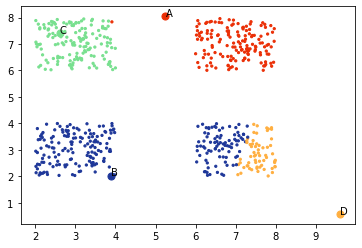

In [11]:
def draw_clustered_data(data, clusters):
    plt.scatter(data['x'], data['y'], c=data['color'], s=5)
    for _, cluster in clusters.iterrows():
        x, y, cluster_id, color = cluster['x'], cluster['y'], cluster['cluster_id'], cluster['color']
        plt.scatter(x, y, c=color, s=50)
        plt.annotate(cluster_id, (x, y))
    return
        
draw_clustered_data(data, clusters)

### Step 3. 각 군집 내의 평균점으로 클러스터를 수정한다.

In [12]:
def adjust_clusters(clustered_data, clusters):
    updated_clusters = data.pivot_table(index=['cluster_id', 'color'],
                                        values=['x','y'],
                                        aggfunc='mean').reset_index()
    updated_cluster_ids = updated_clusters['cluster_id'].values
    
    is_updated = clusters['cluster_id'].isin(updated_cluster_ids)
    not_updated_clusters = clusters[~is_updated]
    
    return pd.concat([updated_clusters, not_updated_clusters])

new_clusters = adjust_clusters(data, clusters)
new_clusters

,cluster_id,color,x,y
0,A,#eb2f06,6.982168,7.012867
1,B,#1e3799,4.321816,3.087728
2,C,#78e08f,2.996434,7.045240
3,D,#ffaf40,7.569008,2.846979


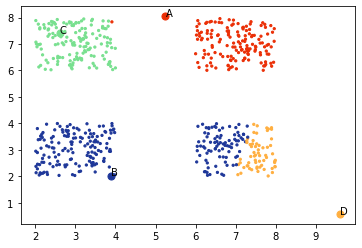

In [13]:
draw_clustered_data(data, clusters)

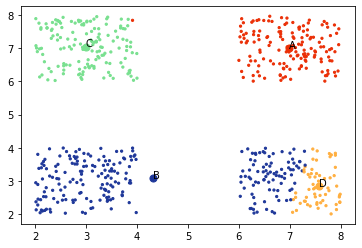

In [14]:
draw_clustered_data(data, new_clusters)

### Step 4. 1회 iteration 끝! 최초 계획한 iteration 만큼 step 2, 3을 반복한다.

Initial State
Iteration 1 DONE!
Iteration 2 DONE!
Iteration 3 DONE!
Iteration 4 DONE!
Iteration 5 DONE!
Iteration 6 DONE!
Iteration 7 DONE!
Iteration 8 DONE!
Iteration 9 DONE!
Iteration 10 DONE!


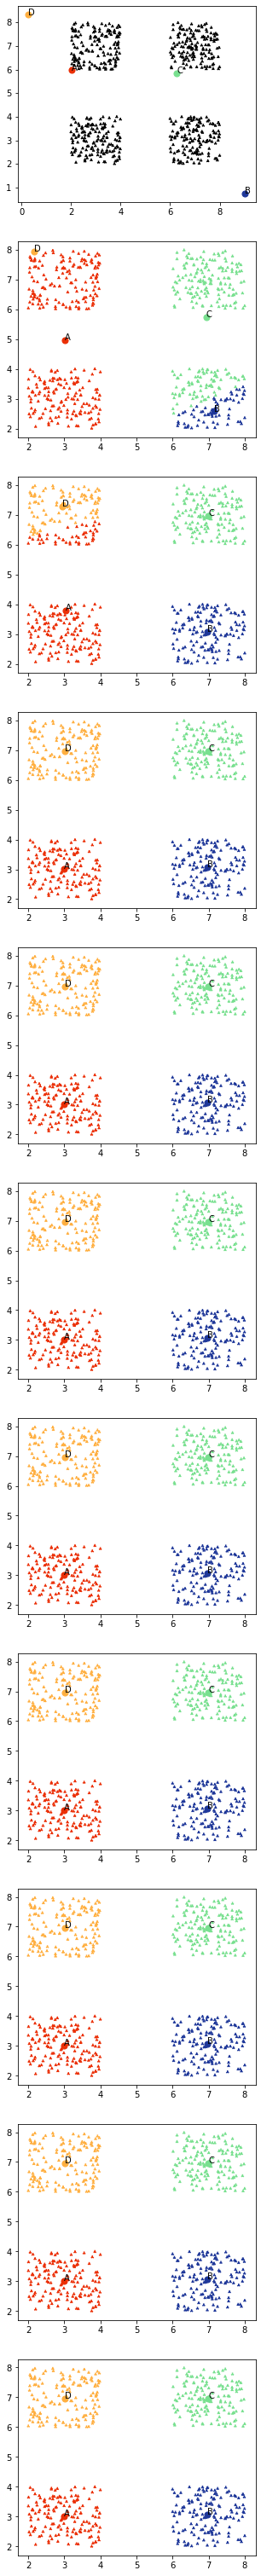

In [15]:
def random_coord(x_min=0, x_max=10, y_min=0, y_max=10):
    pos_x = random.uniform(x_min, x_max)
    pos_y = random.uniform(y_min, y_max)
    return (pos_x, pos_y)

# data => x, y, cluster_id, color
# clusters = > x, y, cluster_id, color

data_samples = [random_coord(2, 4, 2, 4) for _ in range(150)]
data_samples += [random_coord(6, 8, 6, 8) for _ in range(150)]
data_samples += [random_coord(2, 4, 6, 8) for _ in range(150)]
data_samples += [random_coord(6, 8, 2, 4) for _ in range(150)]

data = pd.DataFrame(data_samples, columns=['x', 'y'])
data['color'] = 'black'
data['cluster_id'] = ''

clusters = [random_coord() for _ in range(4)]
clusters = pd.DataFrame(clusters, columns=['x', 'y'])
clusters['color'] = ['#eb2f06', '#1e3799', '#78e08f', '#ffaf40']
clusters['cluster_id'] = ['A', 'B', 'C', 'D']
clusters

def nearest_cluster(x, y, clusters):
    clusters_frame = clusters.copy()
    distance_between_cluster = lambda cluster : ((x - cluster.x)**2 + (y - cluster.y)**2)**0.5
    # distance를 계산하는 함수를 익명함수로 생성하도록 하였음. 매번 x, y 값이 바뀌므로.
    clusters_frame['distance'] = clusters_frame.apply(distance_between_cluster, axis=1)
    return clusters_frame.iloc[clusters_frame.distance.idxmin()][['cluster_id', 'color']]
    # cluster의 이름과 컬러만 있으면 됨.

def adjust_data(data, clusters):
    data[['cluster_id', 'color']] = data.apply(lambda datum : nearest_cluster(datum.x, datum.y, clusters), axis=1)
    return data
    
def adjust_clusters(clustered_data, clusters):
    updated_clusters = data.pivot_table(index=['cluster_id', 'color'],
                                        values=['x','y'],
                                        aggfunc='mean').reset_index()
    updated_cluster_ids = updated_clusters['cluster_id'].values
    
    is_updated = clusters['cluster_id'].isin(updated_cluster_ids)
    not_updated_clusters = clusters[~is_updated]
    
    return pd.concat([updated_clusters, not_updated_clusters])

def draw_clustered_data(data, clusters, ax):
    ax.scatter(data['x'], data['y'], c=data['color'], s=15, marker='2')
    for _, cluster in clusters.iterrows():
        x, y, cluster_id, color = cluster['x'], cluster['y'], cluster['cluster_id'], cluster['color']
        ax.scatter(x, y, c=color, s=50)
        ax.annotate(cluster_id, (x, y))
    return

def clustering(data, clusters, iteration=1):
    fig, axs = plt.subplots(iteration+1, 1, figsize=(5, (iteration + 1)*5))
    print('Initial State')
    draw_clustered_data(data, clusters, axs[0])
    for step in range(iteration):
        data = adjust_data(data, clusters)
        clusters = adjust_clusters(data, clusters)
        print(f'Iteration {step + 1} DONE!')
        draw_clustered_data(data, clusters, axs[step + 1])
    return data, clusters

clustered_data, final_clusters = clustering(data, clusters, 10)

In [16]:
final_clusters

,cluster_id,color,x,y
0,A,#eb2f06,2.995809,3.015814
1,B,#1e3799,6.973242,3.065691
2,C,#78e08f,6.994331,6.968184
3,D,#ffaf40,3.013114,6.955287


In [17]:
cluster_a = clustered_data['cluster_id'] == 'A'
cluster_b = clustered_data['cluster_id'] == 'B'
cluster_c = clustered_data['cluster_id'] == 'C'
cluster_d = clustered_data['cluster_id'] == 'D'

(0.0, 10.0)

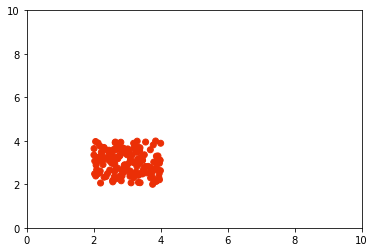

In [18]:
plt.scatter(clustered_data[cluster_a]['x'],
            clustered_data[cluster_a]['y'],
            c=clustered_data[cluster_a]['color'])
plt.xlim(0,10)
plt.ylim(0,10)

## (extra) K-means++, Elbow method

# Scikit-learn 라이브러리를 사용하여 간단하게 적용해보자.
### iris 데이터셋을 사용해보자

In [19]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

In [20]:
dataset = load_iris(as_frame=True)
iris_data = dataset.frame
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html 참고
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# 정답 미리보기
- iris 의 데이터셋의 분류는 어떻게 되어있는가? (target)

In [21]:
iris_data['target'].value_counts()

2    50
1    50
0    50
Name: target, dtype: int64

In [22]:
feature_names = dataset.feature_names
iris_features = iris_data[feature_names]
iris_features

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [23]:
# 아래 링크 참고
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html?highlight=means#sklearn.cluster.KMeans 
k_means = KMeans(n_clusters=3).fit(iris_features)

In [24]:
iris_data['clustered_result'] = k_means.labels_

In [27]:
iris_data
# clustered_result의 0,1,2 는 KMeans 가 임의로 정의한 label임 따라서 target의 0,1,2와 다를 수 있음.

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,clustered_result
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2
146,6.3,2.5,5.0,1.9,2,0
147,6.5,3.0,5.2,2.0,2,2
148,6.2,3.4,5.4,2.3,2,2


In [26]:
iris_data['clustered_result'].value_counts()

0    62
1    50
2    38
Name: clustered_result, dtype: int64